In [1]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)     #sinh ngẫu nhiên ma trận X0
X1 = np.random.multivariate_normal(means[1], cov, N)     #sinh ngẫu nhiên ma trận X1
X2 = np.random.multivariate_normal(means[2], cov, N)     #sinh ngẫu nhiên ma trận X2

X = np.concatenate((X0, X1, X2), axis = 0)       #ghép X0, X1, X2 theo chiều dọc (mỗi hàng trong ma trận X là 1 data point)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T  #sinh nhãn ban đầu 500 500 500

In [8]:
original_label.shape

(1500,)

In [34]:
X.shape[0]

1500

In [55]:
def kmeans_display(X, label, center):
    plt.figure(figsize=(7,5))
    K = np.amax(label) + 1
    X0 = X[label == 0, :]  #gán cho X0 là 500 giá trị đầu
    X1 = X[label == 1, :]  #gán cho X1 là 500 giá trị tiếp
    X2 = X[label == 2, :]  #gán cho X2 là 500 giá trị cuối
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8, markeredgecolor='black')
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8, markeredgecolor='black')
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8, markeredgecolor='black')
    for i in range(K):
        plt.plot(center[i, 0], center[i, 1], 'yo', markersize = 10)
    

    plt.axis('equal')
    plt.plot()
    plt.show()
    
# kmeans_display(X, original_label,[kmeans_init_centers(X, K)])
# X[original_label == 0, :].shape

In [37]:
def kmeans_init_centers(X, k):
    # nhặt ngẫu nhiên k hàng của tập dataset làm center ban đầu
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [38]:
def kmeans_assign_labels(X, centers):
    D = cdist(X, centers)            #tính khoảng cách giữa các điểm và center
    return np.argmin(D, axis = 1)    #trả về chỉ số của hàng có giá trị nhỏ nhất trong D (thuộc (0, 1, 2))

In [39]:
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))    #tạo k điểm center bằng 0 có kích thước 1xX.shape[1]
    for k in range(K):                     
        Xk = X[labels == k, :]            #nhặt hết các điểm có label là k
        centers[k,:] = np.mean(Xk, axis = 0)   #lấy trung bình các điểm theo chiều dọc rồi gán vào center mới
    return centers

In [40]:
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [41]:
test = [[2, 2], [1, 3], [3, 6]]
np.argmin(test, axis = 1) 

array([0, 0, 0], dtype=int64)

In [42]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]   #tạo center ban đầu
    labels = []                             #tạo list nhãn rỗng
    it = 0                                  #biến đếm khởi tọa bằng 0
    while True:   #chạy đến khi break
        labels.append(kmeans_assign_labels(X, centers[-1]))   #cập nhật nhãn mới cho các data point rồi append vào list labels  
        new_centers = kmeans_update_centers(X, labels[-1], K) #tính toán center mới rồi gán vào new_centers
        if has_converged(centers[-1], new_centers):           #nếu hội tụ thì break
            break
        centers.append(new_centers)                           #nếu chưa hội tụ thì append vào list centers
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[1.9780868  2.0065323 ]
 [8.0410628  3.02094748]
 [2.9898012  6.03271696]]


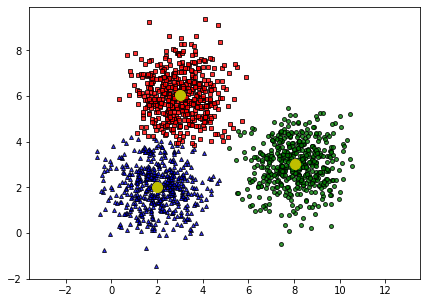

In [56]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1], centers[-1])